# Data Cleaning and Analytics

## Data collection and cleaning
Web scraping was used to gather the data. Using Python, missing data could be removed along with any unnecessary columns

---
## Data Analysis and Visualization
I first started off figuring out what columns were presented to me and what type of analysis I could do based on the given information. I did a few things:
<div>
<li> Looked for key words in the job title </li>
<li> Looked at Job distrirbution based on company sector</li>
<li> Made a treemap based off job titles in each company sectorr</li>
</div>



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
glassdoor_data=pd.read_csv('glassdoor_cleaned.csv')
glassdoor_data.head()

,company_name,job_title,job_overview,company_industry,company_type,company_sector
0,Google,"Facilities Manager, Data Center Operations",Minimum qualifications:\n\nBachelor's degree o...,Internet & Web Services,Company - Public,Information Technology
1,Google,"Data Engineer, Go-to-Market",The application window will be open until at l...,Internet & Web Services,Company - Public,Information Technology
2,Google,"Legal Specialist, Employment Litigation",Minimum qualifications:\n\nBachelor's degree o...,Internet & Web Services,Company - Public,Information Technology
3,Google,"Customer Engineer II, Infrastructure Moderniza...",Note: Googleâ€™s hybrid workplace includes rem...,Internet & Web Services,Company - Public,Information Technology
4,Google,"Facilities Manager, Data Center Operations",Minimum qualifications:\n\nBachelor's degree o...,Internet & Web Services,Company - Public,Information Technology


In [ ]:
glassdoor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   company_name      1000 non-null   object
 1   job_title         1000 non-null   object
 2   job_overview      1000 non-null   object
 3   company_industry  1000 non-null   object
 4   company_type      1000 non-null   object
 5   company_sector    1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


In [ ]:
glassdoor_data.columns

Index(['company_name', 'job_title', 'job_overview', 'company_industry',
       'company_type', 'company_sector'],
      dtype='object')

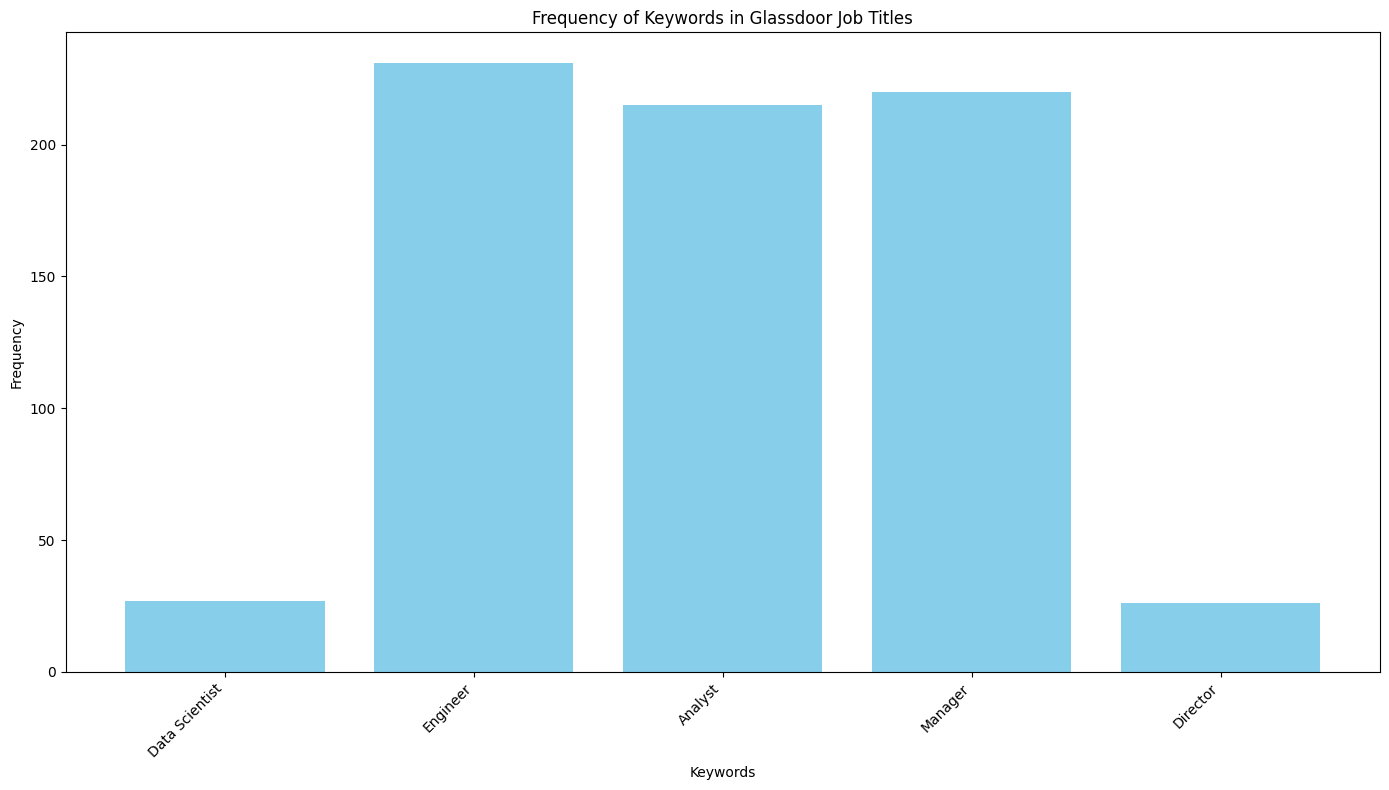

In [ ]:
keywords = ['Data Scientist', 'Engineer', 'Analyst', 'Manager', 'Director']



keyword_counts = {
    keyword: glassdoor_data['job_title'].str.contains(keyword, case=False, na=False).sum() for keyword in keywords
}

keyword_df = pd.DataFrame(list(keyword_counts.items()), columns=['Keyword', 'Count'])

# plot the bar graph
plt.figure(figsize=(14, 8))
plt.bar(keyword_df['Keyword'], keyword_df['Count'], color='skyblue')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title('Frequency of Keywords in Glassdoor Job Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px


# Count the number of job titles by company sector
sector_counts = glassdoor_data['company_sector'].value_counts().reset_index()
sector_counts.columns = ['sector', 'count']

# Create a radial bar chart
fig = px.bar(sector_counts,
             x='sector',
             y='count',
             color='sector',
             title="Job Distribution Across Company Sectors",
             template='plotly_dark')

fig.update_traces(marker=dict(line=dict(width=2, color='white')))
fig.show()


In [ ]:
# Count job titles per company
company_job_counts = glassdoor_data.groupby('company_name').size().reset_index(name='job_count')

# Create a bubble chart
fig = px.scatter(company_job_counts,
                 x='company_name',
                 y='job_count',
                 size='job_count',
                 color='company_name',
                 title='Bubble Chart of Job Titles by Company',
                 hover_name='company_name',
                 size_max=60)

fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))
fig.show()


In [ ]:
# Create a treemap
fig = px.treemap(glassdoor_data,
                 path=['company_sector', 'job_title'],
                 title='Job Titles Distribution Across Sectors')

fig.show()
